# Data Driven Forecasting Project Walkthrough.

>>**Divyanshu Vyas | Data Science/Machine Learning for E&P**

> This is a code notebook that explains how we can forecast the future values of a Time Series. 

A Time Series is nothing but a Sequential Dataset collected at regular time intervals. 

Example- Production Data with every TimeStamp is also a Time Series. 

### Step 1 : Import Libraries. 

> Import All Libraries you need. 
1. Numpy and Pandas for Data analysis and manipulation. 
2. Statsmodels for Statistical Calculations & Evaluation of Time Series Data. 

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Step 2. Import Dataset. 

Note that 'MS' sets the frequency of Time Series to 'Monthly Start'. Since Data is collected at Day 1 of every month.

This Dataset is about Number of Employees (x1000) in a firm.

In [3]:
# Load datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'

df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


### Step 2. A. Preliminary plotting. 

Trend - You can see that the Time Series is Upward Trending. I.E - The Magnitude is increasing with time. 

Seasonality - You can see that every year has a peak. This is called seasonality. 

Noise - Theres not much noise in this data. 

Note- Trend Seasonality and Noise are the attributes/properties of a Time Series Data. 

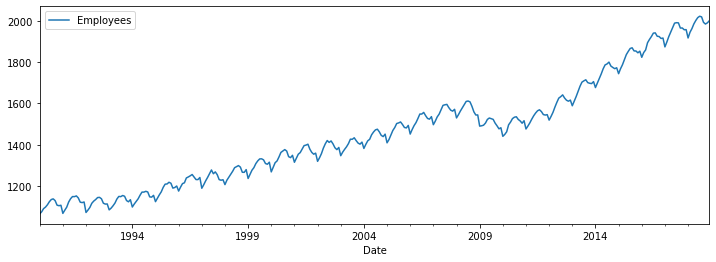

In [5]:
df.plot(figsize=(12,4))

**Visualizing Trend and Seasonality**

In [6]:
df['Means'] = df.rolling(window=30).mean()

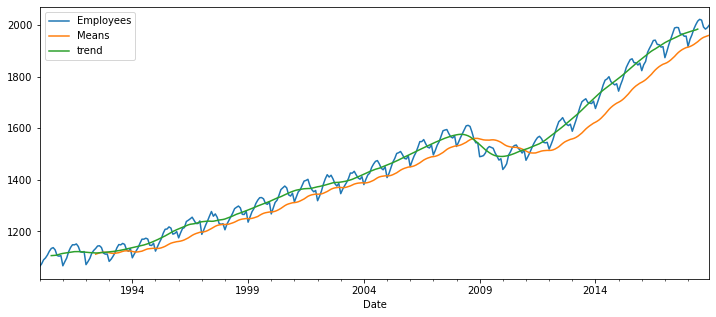

In [25]:
df['Employees'].plot(figsize=(12,5),legend=True)
df['Means'].plot(figsize=(12,5),legend=True)
ets.trend.plot(figsize=(12,5),legend=True)

#### Plot to display seasonality

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
ets = seasonal_decompose(df['Employees'])

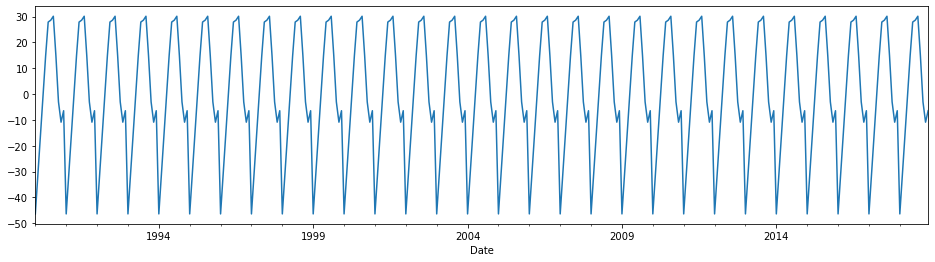

In [20]:
ets.seasonal.plot(figsize=(16,4))

In [19]:
#You can see peaks on every year.
#That shows an yearly seasonality.

In [23]:
#Why this is important?  - To decide a particular Time series model. eg. SARIMA where S is for Seasonal.

### Just an illustration of how differencing makes a Time Series Stationary.

In [29]:
import matplotlib.pyplot as plt

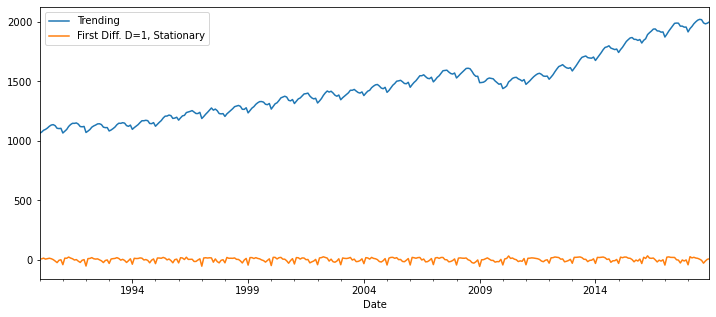

In [33]:
df['Employees'].plot(figsize=(12,5),label='Trending',legend=True)
df['Employees'].diff().plot(figsize=(12,5),label='First Diff. D=1, Stationary',legend=True)

## Step 3- Now Finally Selecting a Time Series Model.

Example - AR-I-MA : Here, AR means Auto Regressive. It referes to a regression fit between today's values and past values. Note that further we go in the past, these Correlations get weaker, hence we have to stop to a particular lag (time shift). This truncation point is given by the order **p**. 

I- Refers to How many differences we need to make to the time series to make it stationary (Horizontal Trend/No TrenD) just like a line gets horizontal by one differntiation. This order is given by **d**. 

MA - It is Moving Average, Whatever Relation/Forecast is not explained by AR, MA does it. Its order is given by **q**.

A Library called pmdarima automatically gives us these p,d,q orders. 

They are important because they ultimately build the forecasting model's equation.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.



## The Math behind the models-

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.

## Stp 4. Finding orders (p,d,q)

In [34]:
from pmdarima import auto_arima

In [35]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 20 Dec 2020   AIC                           2208.504
Time:                                      20:22:03   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.577      0.000       0.836       1.013
ma.L1         -0.9442      0.070    -13.437      0.000      -1.082      -0.806
ma.L2          0.1288      0.060      2.136      0.033       0.011       0.247
ar.S.L12       0.9972      0.001    706.173      0.000       0.994       1.000
ma.S.L12      -0.7491      0.043    -17.319      0.000      -0.834      -0.664
sigma2        29.2963      1.717     17.061      0.000      25.931      32.662
===================================================================================
Ljung-Box (Q):                       31.49   Jarque-Bera (JB):                67.43
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
#Hence, the suggested model is - SARIMAX(1, 1, 2)x(1, 0, [1], 12)

## Step 5. Train - Test Sequential split. 

> Split The data in 80-20 fraction in a sequential order, keeping the latter 20% as if it were future data (unseen). 

> Once we train the data on top 80%, we'll evaluate the forecasts on the latter 20% (test data).

In [37]:
df = df.iloc[:,:-1]
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [41]:
#Here, I'm going with just 12 months as the future. so, 0-336 as train. 336-348 as test.

In [42]:
train = df.iloc[:336]
test = df.iloc[336:]

#### Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [43]:
model = SARIMAX(train['Employees'],order = (1, 1, 2), seasonal_order =(1,0,1,12) )

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 20 Dec 2020   AIC                           2128.116
Time:                                      20:31:05   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.209      0.000       0.839       1.010
ma.L1         -0.9583      0.070    -13.715      0.000      -1.095      -0.821
ma.L2          0.1496      0.060      2.474      0.013       0.031       0.268
ar.S.L12       0.9973      0.001    726.824      0.000       0.995       1.000
ma.S.L12      -0.7517      0.044    -17.154      0.000      -0.838      -0.666
sigma2        28.7664      1.684     17.079      0.000      25.465      32.068
===================================================================================
Ljung-Box (Q):                       29.89   Jarque-Bera (JB):                73.35
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### By Now, our SARIMAX model of selected orders has understood the training data and has fit into it.

## Step 6- Let's Make predictions.

In [45]:
start = len(train)
end = len(test) + len(train) - 1
yp = results.predict(start,end,typ='levels').rename('SARIMAX-Preds')

In the above step, the typ='levels' is provided because, the entire forecast is actually done on the differenced (And hence stationary version) of the time series. And hence, it is important to undo the differening (kind of reverse-differentiation).

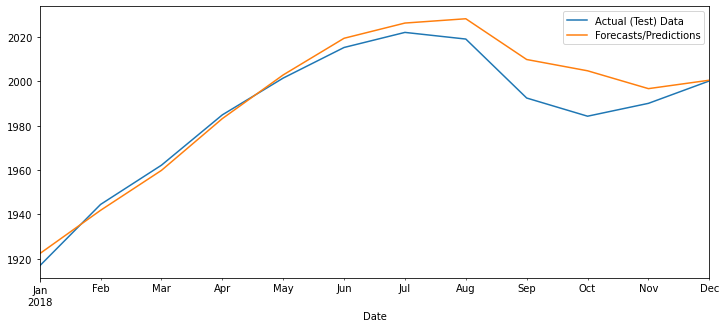

In [47]:
test['Employees'].plot(figsize=(12,5),label='Actual (Test) Data',legend=True)
yp.plot(figsize=(12,5),label='Forecasts/Predictions',legend=True)

Note that the Model didn't see the Test Data (Beyond Jan 2018) at all. But still it was able to make almost accurate forecasts based on what it learnt from the training data. 

This is purely Data Driven Forecast since everything the model learnt for a successful forecast, was from the Data itself.

## Step 7- Model Evaluation and Error%

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
rmse = mean_squared_error(yp,test['Employees'])**0.5

In [50]:
rmse

8.813380381169651

In [51]:
test['Employees'].mean()

1986.125

In [52]:
E = 100*rmse/test['Employees'].mean()

A = 100 - E

In [53]:
E,A

(0.4437475174608673, 99.55625248253914)

0.44 % Error and around 99% Accuracy. 

In [54]:
##The End##